In [1]:
import pandas as pd
df = pd.read_csv(r'D:\Portfolio Projects\Supply Chain\archive (3)\supply_chain_data.csv')

In [5]:
print(df.head)

<bound method NDFrame.head of    Product type SKU(Stock Keeping Unit)      Price  Availability  \
0      haircare                    SKU0  69.808006            55   
1      skincare                    SKU1  14.843523            95   
2      haircare                    SKU2  11.319683            34   
3      skincare                    SKU3  61.163343            68   
4      skincare                    SKU4   4.805496            26   
..          ...                     ...        ...           ...   
95     haircare                   SKU95  77.903927            65   
96    cosmetics                   SKU96  24.423131            29   
97     haircare                   SKU97   3.526111            56   
98     skincare                   SKU98  19.754605            43   
99     haircare                   SKU99  68.517833            17   

    Number of products sold  Revenue generated Customer demographics  \
0                       802        8661.996792            Non-binary   
1        

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU(Stock Keeping Unit)  100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [7]:
print(df.describe())

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239830     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976920   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

In [8]:
missing_values = df.isnull().sum()
print("Missing Values:\n",missing_values)

Missing Values:
 Product type               0
SKU(Stock Keeping Unit)    0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64


In [11]:
duplicate_rows = df[df.duplicated()]
print("duplicate rows:\n",duplicate_rows)

duplicate rows:
 Empty DataFrame
Columns: [Product type, SKU(Stock Keeping Unit), Price, Availability, Number of products sold, Revenue generated, Customer demographics, Stock levels, Lead times, Order quantities, Shipping times, Shipping carriers, Shipping costs, Supplier name, Location, Lead time, Production volumes, Manufacturing lead time, Manufacturing costs, Inspection results, Defect rates, Transportation modes, Routes, Costs]
Index: []

[0 rows x 24 columns]


In [15]:
print(df.columns)

Index(['Product type', 'SKU(Stock Keeping Unit)', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')


In [14]:
import matplotlib.pyplot as plt

Skipping 'Product type' because it contains non numeric data.
Skipping 'SKU(Stock Keeping Unit)' because it contains non numeric data.


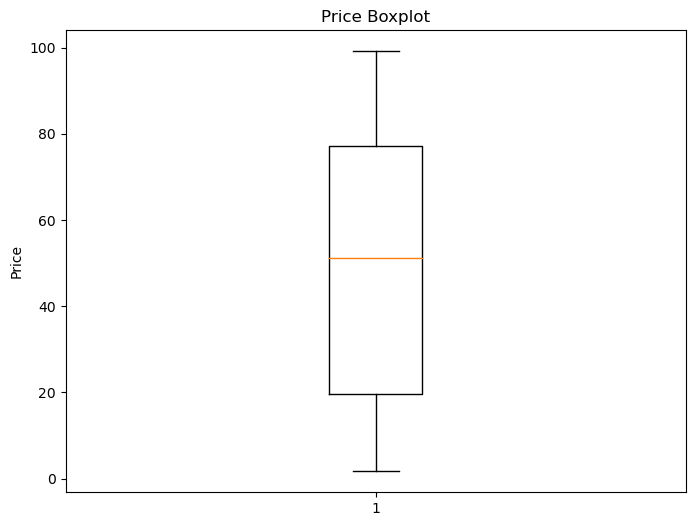

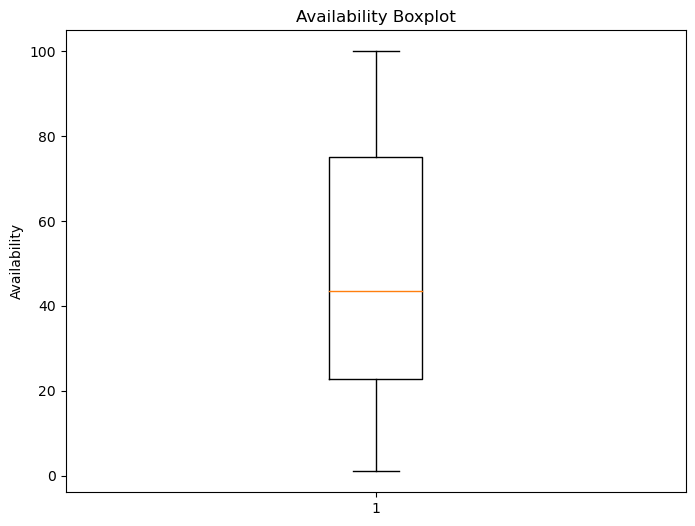

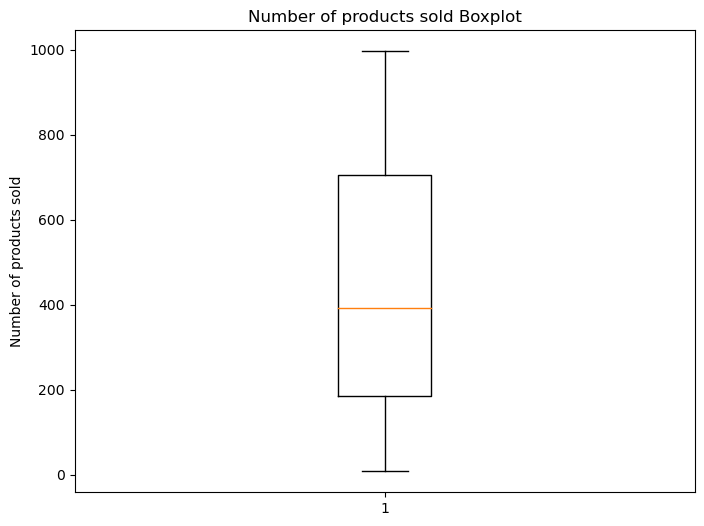

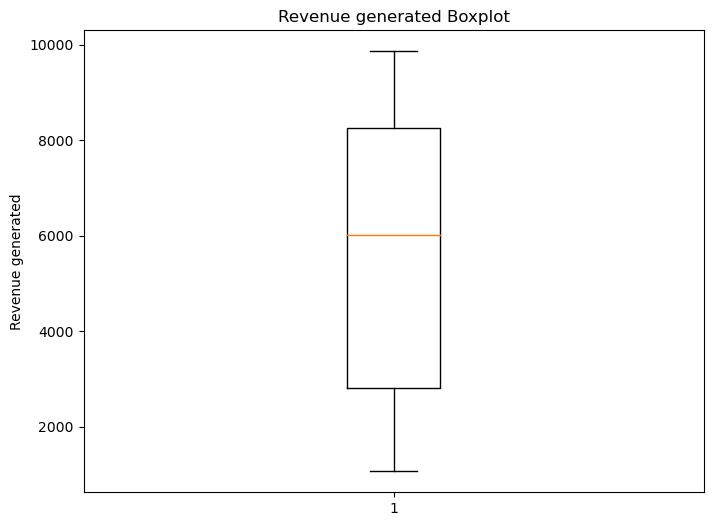

Skipping 'Customer demographics' because it contains non numeric data.


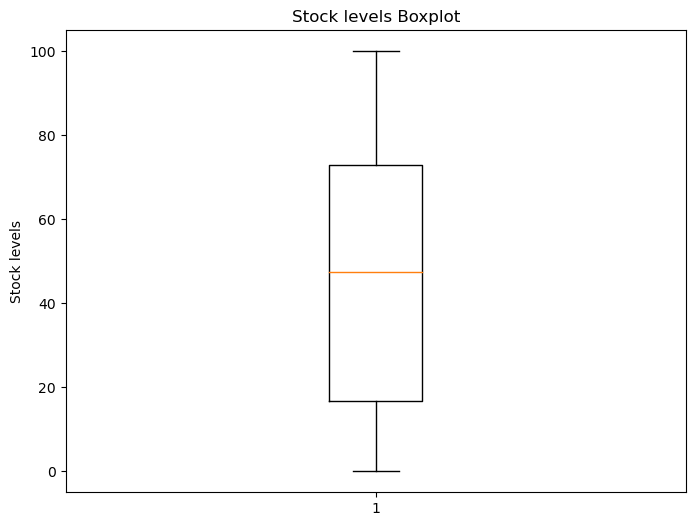

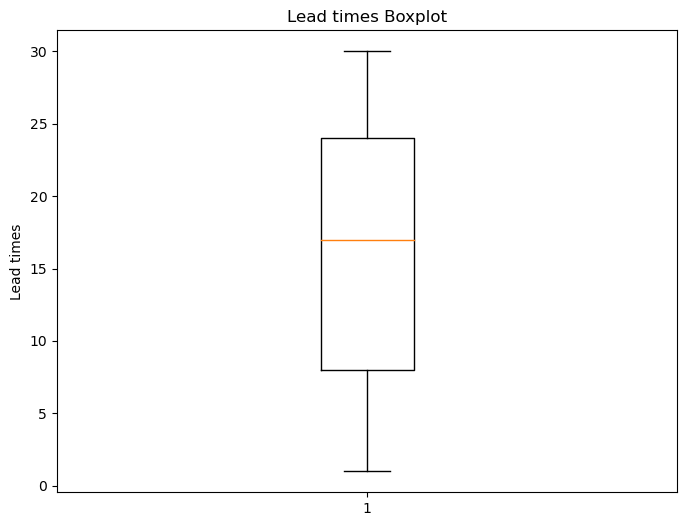

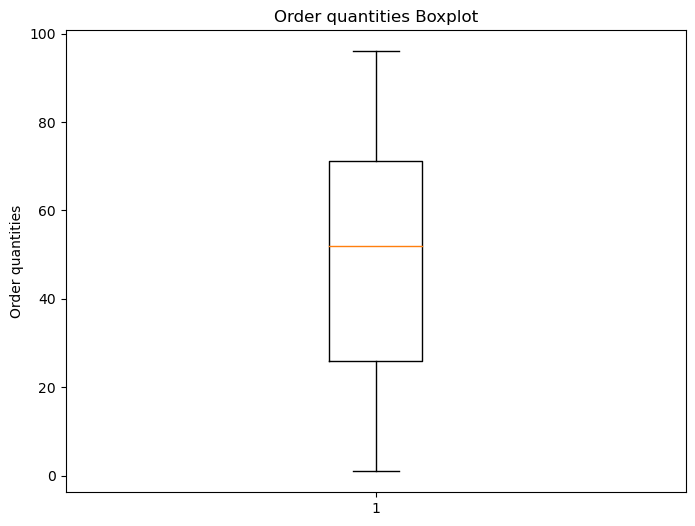

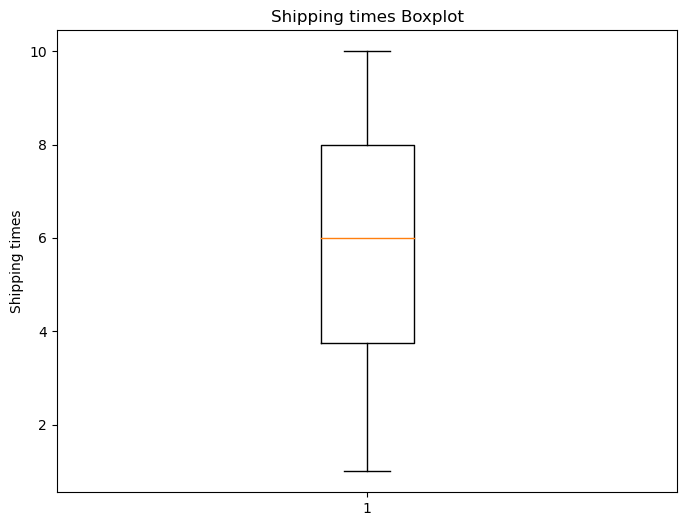

Skipping 'Shipping carriers' because it contains non numeric data.


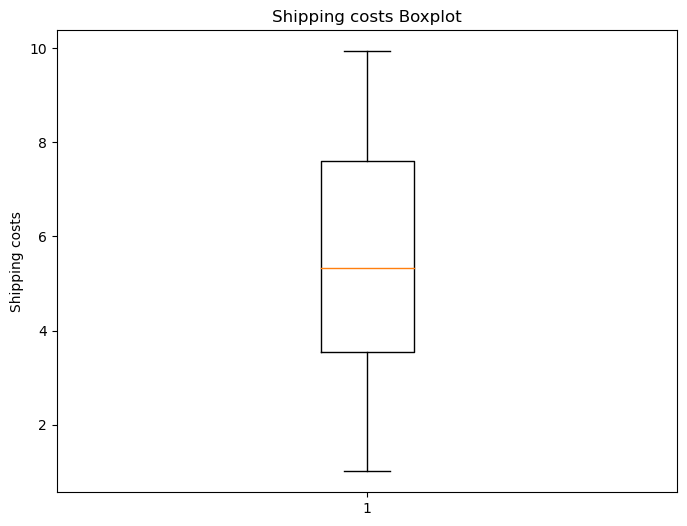

Skipping 'Supplier name' because it contains non numeric data.
Skipping 'Location' because it contains non numeric data.


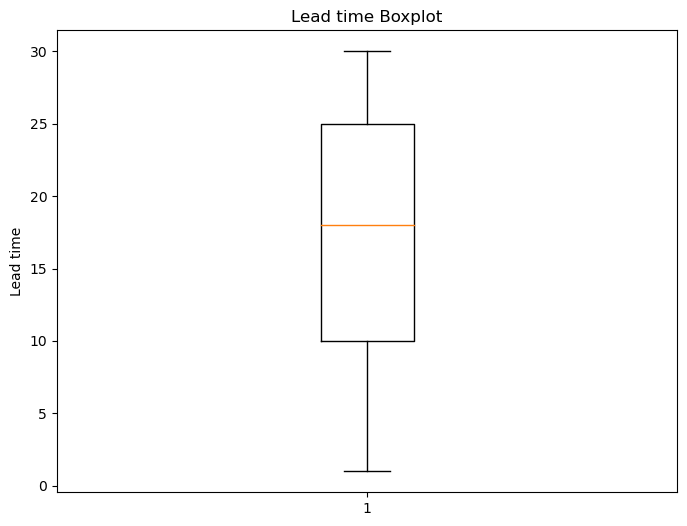

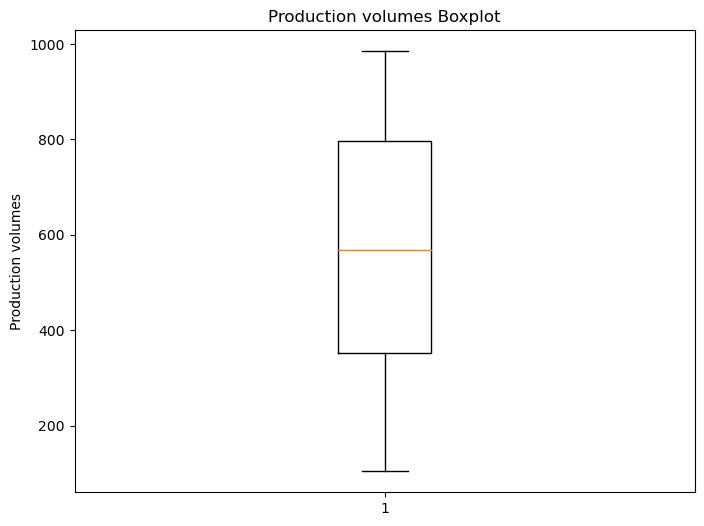

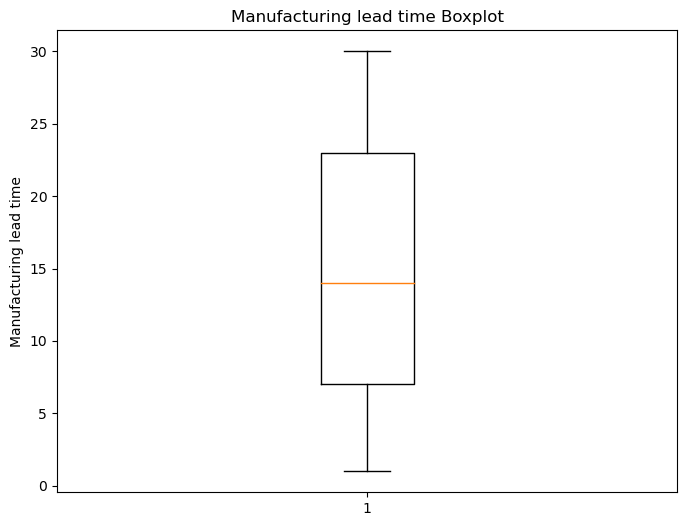

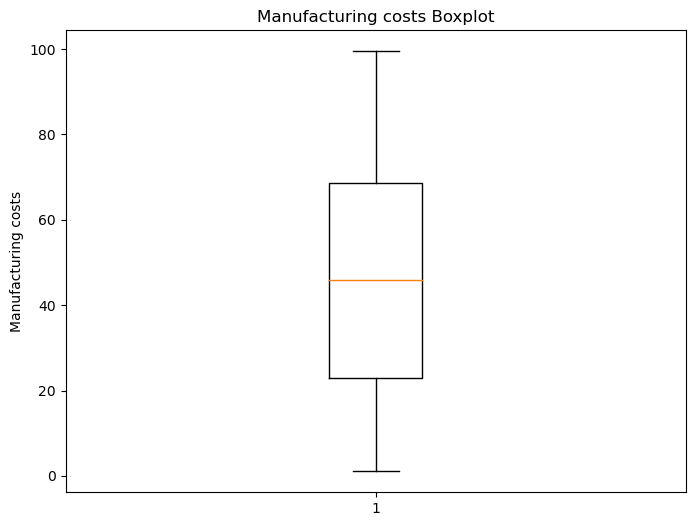

Skipping 'Inspection results' because it contains non numeric data.


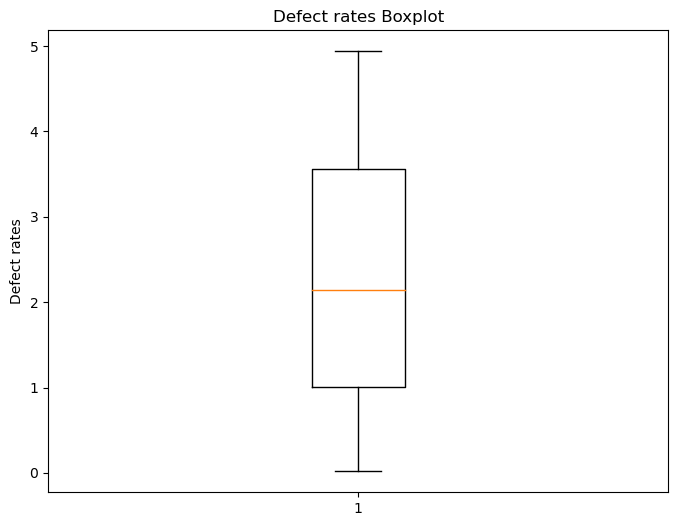

Skipping 'Transportation modes' because it contains non numeric data.
Skipping 'Routes' because it contains non numeric data.


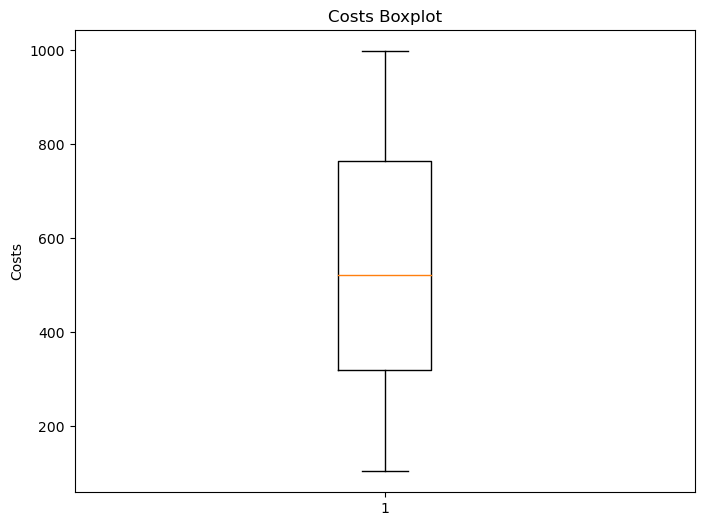

In [19]:
columns_to_check = ['Product type', 'SKU(Stock Keeping Unit)', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs']
for column in columns_to_check:
   if pd.api.types.is_numeric_dtype(df[column]): 
        plt.figure(figsize=(8,6))
        plt.boxplot(df[column])
        plt.title(column+' Boxplot')
        plt.ylabel(column)
        plt.show()
   else:
        print(f"Skipping '{column}' because it contains non numeric data.")

In [6]:
transport_modes_count = df.groupby('Supplier name')['Transportation modes'].nunique().reset_index()
transport_modes_count = transport_modes_count.rename(columns={'Transportation modes': 'Transport modes count'})
max_transport_modes_supplier = transport_modes_count.loc[transport_modes_count['Transport modes count'].idxmax()]
print("Supplier with the most transportation modes:")
print(max_transport_modes_supplier)

Supplier with the most transportation modes:
Supplier name            Supplier 1
Transport modes count             4
Name: 0, dtype: object


In [4]:
print(transport_modes_count.columns)


Index(['Supplier name', 'Transportation modes'], dtype='object')


In [7]:
df. set_index('Supplier name', inplace=True)
print(df)

              Product type SKU(Stock Keeping Unit)      Price  Availability  \
Supplier name                                                                 
Supplier 3        haircare                    SKU0  69.808006            55   
Supplier 3        skincare                    SKU1  14.843523            95   
Supplier 1        haircare                    SKU2  11.319683            34   
Supplier 5        skincare                    SKU3  61.163343            68   
Supplier 1        skincare                    SKU4   4.805496            26   
...                    ...                     ...        ...           ...   
Supplier 4        haircare                   SKU95  77.903927            65   
Supplier 3       cosmetics                   SKU96  24.423131            29   
Supplier 4        haircare                   SKU97   3.526111            56   
Supplier 5        skincare                   SKU98  19.754605            43   
Supplier 2        haircare                   SKU99  

In [13]:
data = df['Product type']
grouped_data = df.groupby(['Supplier name', 'Transportation modes']).size().reset_index(name='Count')
pivoted_data = grouped_data.pivot(index='Supplier name', columns='Transportation modes', values='Count')
pivoted_data = pivoted_data.fillna(0)
print(pivoted_data)

Transportation modes  Air  Rail  Road  Sea
Supplier name                             
Supplier 1             13     4     7    3
Supplier 2              4    12     2    4
Supplier 3              1     3     6    5
Supplier 4              4     4     8    2
Supplier 5              4     5     6    3


In [17]:
data = df['Product type']
grouped_data = df.groupby(['Supplier name', 'Transportation modes', 'Costs']).size().reset_index(name='sum')
pivoted_data = grouped_data.pivot(index='Supplier name', columns='Transportation modes', values='sum')
pivoted_data = pivoted_data.fillna(0)
print(pivoted_data)

KeyError: 'Supplier name'

In [20]:
pivot_table = pd.pivot_table(df, values='Costs', index='Supplier name', columns='Transportation modes', aggfunc='sum')

print(pivot_table)

Transportation modes          Air         Rail         Road          Sea
Supplier name                                                           
Supplier 1            8291.140771  2041.301789  4337.984113   850.554073
Supplier 2            1942.929775  7051.267949   995.145624  1341.255950
Supplier 3             351.504219  1876.236015  2131.533978  2672.727311
Supplier 4            1974.417822  1974.072065  4663.016126   781.081505
Supplier 5            2044.534910  2226.053741  3920.513800  1457.306681


In [21]:
pivot_table_defect = pd.pivot_table(df, values='Defect rates', index='Supplier name', columns='Transportation modes', aggfunc='sum')
print(pivot_table_defect)

Transportation modes        Air       Rail       Road        Sea
Supplier name                                                   
Supplier 1            21.331937   7.553082  16.875468   2.937515
Supplier 2             8.969986  27.416825   6.216628   9.377065
Supplier 3             0.165872   6.755929  16.277548  13.787442
Supplier 4            11.106522   6.466981  21.744485   2.755165
Supplier 5             5.847696  16.733972  14.893087  10.502595
